# 6. Time-Series Data

## This script contains the following:

### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing data

### 1. Import libraries and data

In [1]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#define path
path = r'/Users/mindydong/Documents/School/Data Analyst/Achievement 6 /Medicare QPP/'

In [3]:
#import data
qpp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'state_agg.pkl'))

###  2. Subsetting, wrangling, and cleaning time-series data

In [5]:
#create subset for year and total_payment
qpp2 = qpp[['year', 'total_payment']]

In [6]:
qpp2.head()

,year,total_payment
231625,2019.0,7.464155e+07
231626,2019.0,6.904088e+06
231627,2019.0,4.917614e+07
231628,2019.0,4.951514e+07
231629,2019.0,3.458350e+08


In [7]:
from datetime import datetime

In [8]:
qpp2 = qpp2.reset_index()

In [9]:
qpp2.head()

,index,year,total_payment
0,231625,2019.0,7.464155e+07
1,231626,2019.0,6.904088e+06
2,231627,2019.0,4.917614e+07
3,231628,2019.0,4.951514e+07
4,231629,2019.0,3.458350e+08


In [10]:
#drop index column 
qpp2.drop(['index'], axis=1, inplace=True)
qpp2.head()

,year,total_payment
0,2019.0,7.464155e+07
1,2019.0,6.904088e+06
2,2019.0,4.917614e+07
3,2019.0,4.951514e+07
4,2019.0,3.458350e+08


In [11]:
qpp2['year'] = pd.to_datetime(qpp2['year'], format='%Y')
qpp2.set_index(qpp2['year'].dt.year, inplace=True)
qpp2.drop(['year'], axis=1, inplace=True)
qpp2.head()

,total_payment
year,
2019,7.464155e+07
2019,6.904088e+06
2019,4.917614e+07
2019,4.951514e+07
2019,3.458350e+08


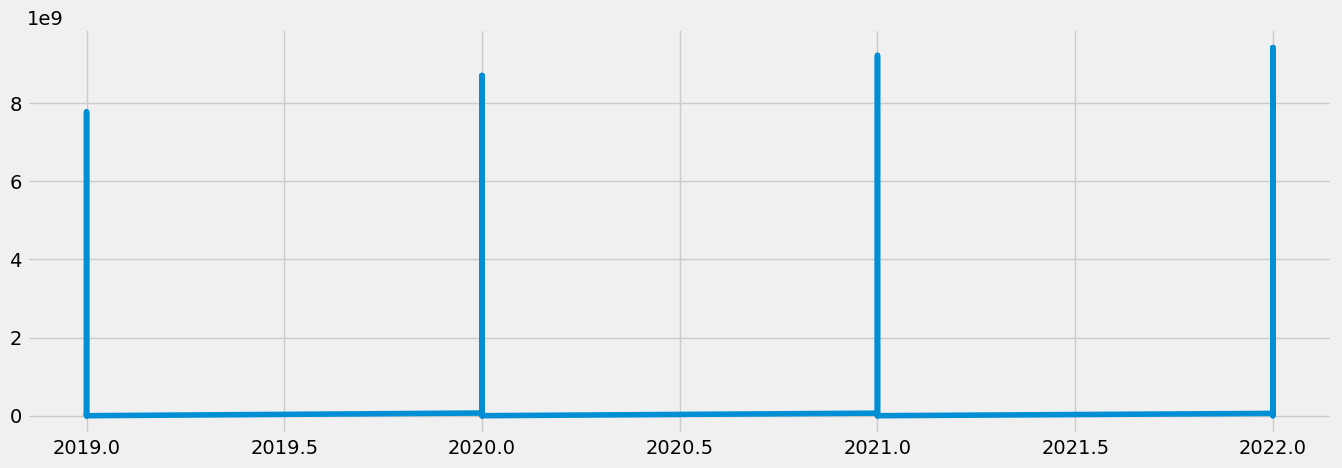

In [12]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(qpp2)

In [13]:
# Check for missing values

qpp2.isnull().sum() 
#no missing values

total_payment    0
dtype: int64

### 3. Time series analysis: decomposition

In [14]:
# decompose the time series using an multiplicative model

decomposition = sm.tsa.seasonal_decompose(qpp2, model='multiplicative', period = 1)

In [15]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

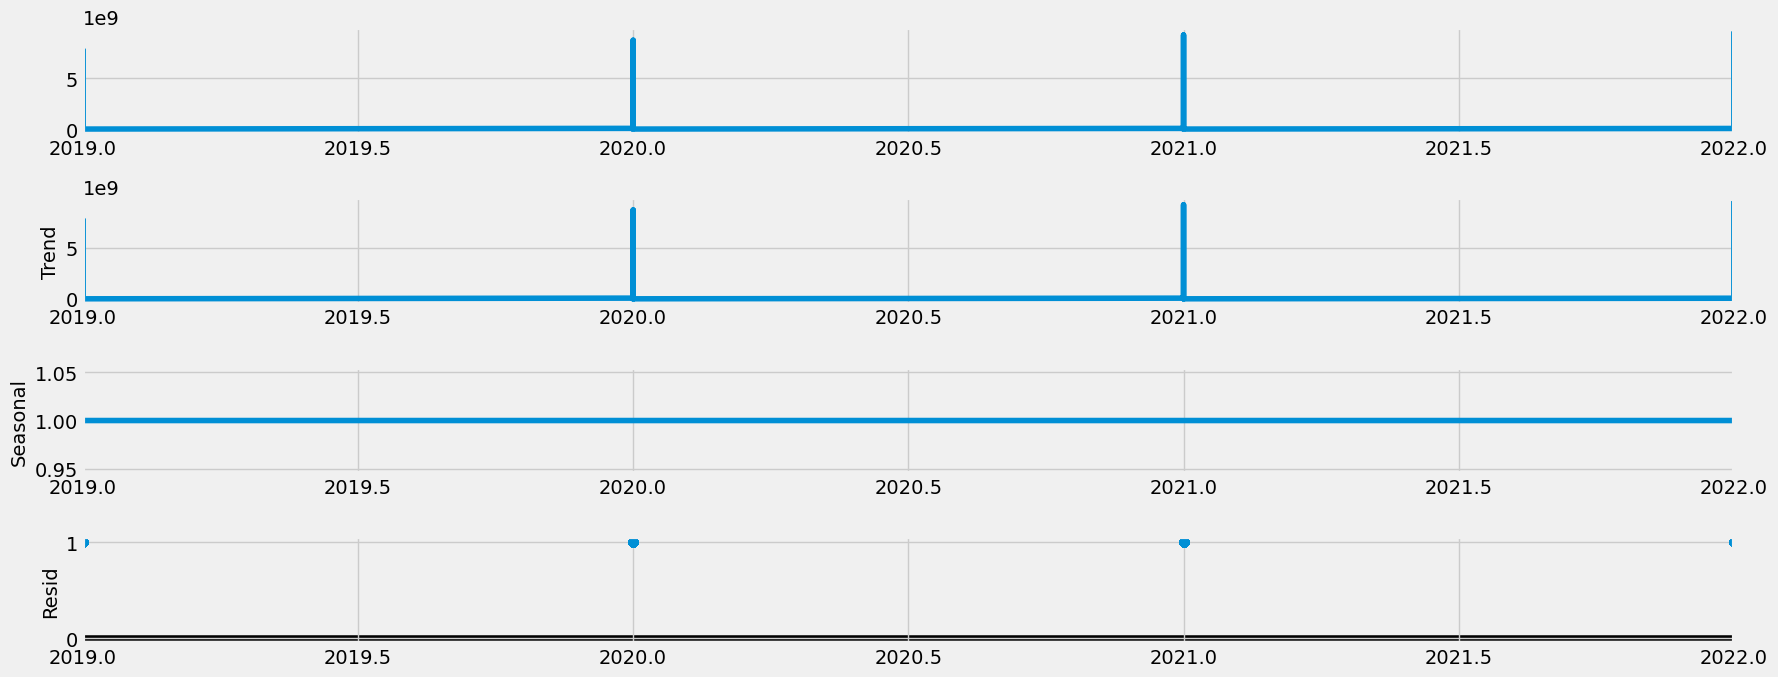

In [16]:
# Plot the separate components

decomposition.plot()
plt.show()

The data is not seasonal. The residual does not have a line, but a series of points at each year, which means that this data exhibits random variation without a discernable pattern or trend.

### 4. Testing for stationarity

In [17]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

In [18]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(qpp2['total_payment'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.400891e+01
p-value                        3.744378e-26
Number of Lags Used            4.100000e+01
Number of Observations Used    1.318100e+04
Critical Value (1%)           -3.430846e+00
Critical Value (5%)           -2.861759e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


Test statistic is significantly smaller than the Critical Value (5%), therefore I can reject the null hypothesis.

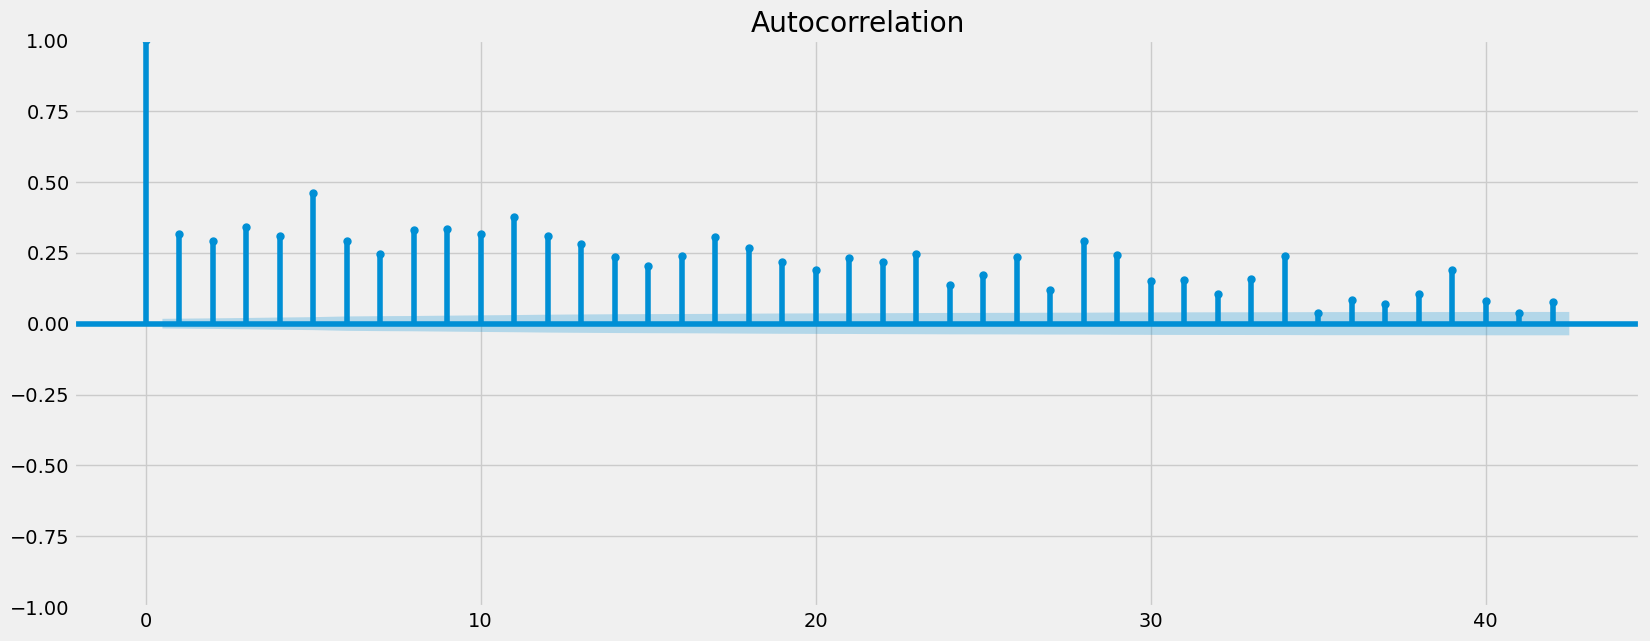

In [19]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(qpp2)
plt.show()

The data has many lags that are correlated with each other, so this data is non-stationary and goes against the Dickey-Fuller test. At this point in time, I'm not quite sure what this really means, but I do know that the original spread of the data was not straightforward to begin with so this may not be an appropriate test for this dataset.

### 5. Stationarizing data

In [20]:
data_diff = qpp2 - qpp2.shift(1)

In [21]:
#drop null values 
data_diff.dropna(inplace = True)

In [22]:
data_diff.head()

,total_payment
year,
2019,-6.773746e+07
2019,4.227205e+07
2019,3.390009e+05
2019,2.963199e+08
2019,-3.127050e+08


In [23]:
data_diff.columns

Index(['total_payment'], dtype='object')

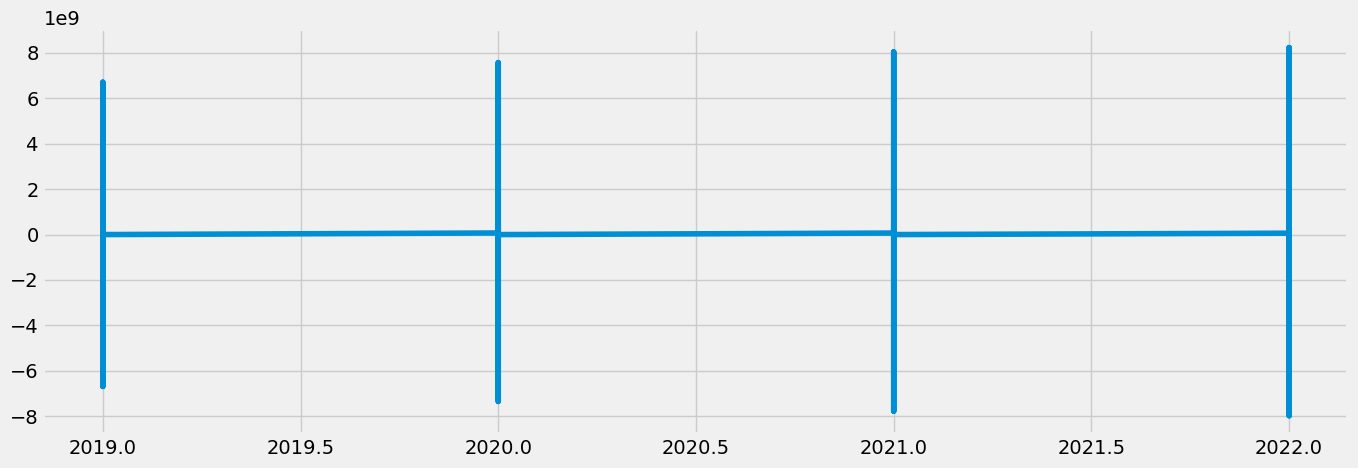

In [24]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -20.038271
p-value                            0.000000
Number of Lags Used               41.000000
Number of Observations Used    13180.000000
Critical Value (1%)               -3.430846
Critical Value (5%)               -2.861759
Critical Value (10%)              -2.566887
dtype: float64


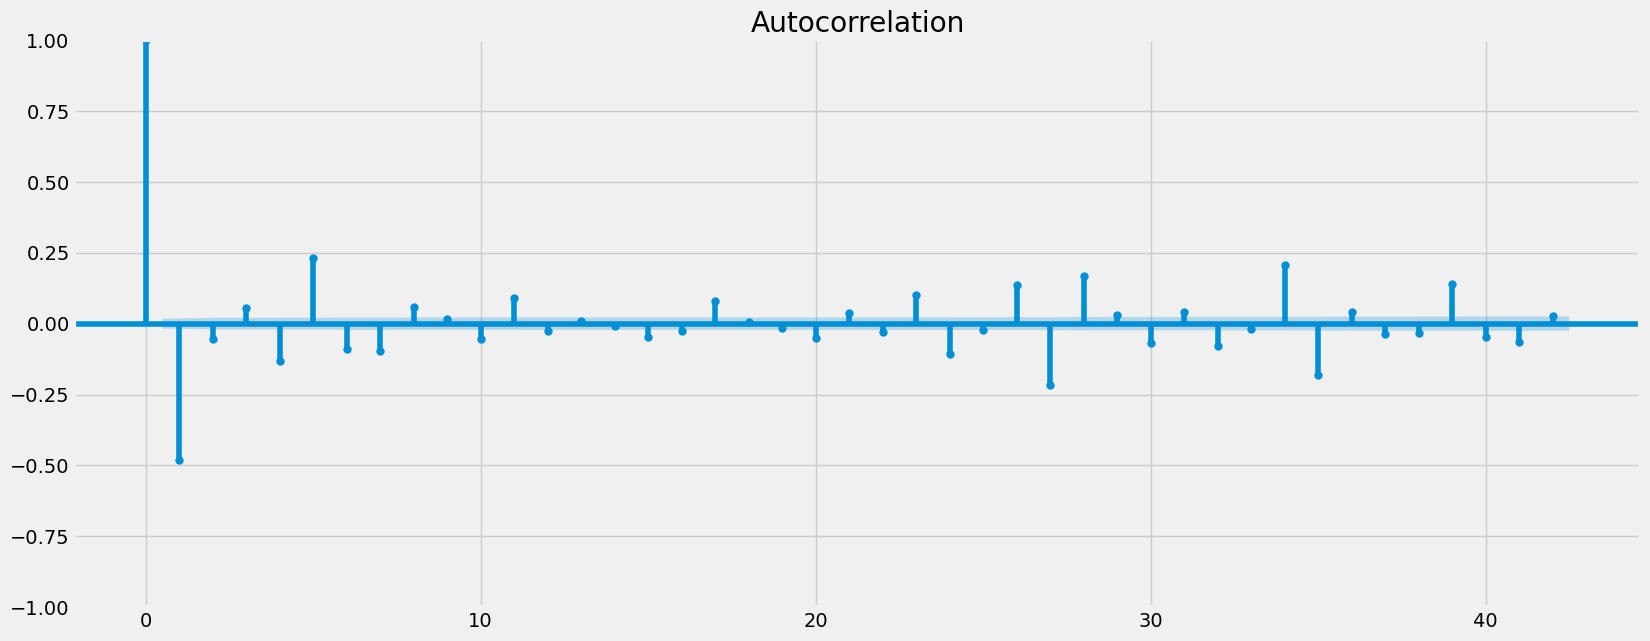

In [26]:
plot_acf(data_diff)
plt.show()